In [11]:
import pandas as pd # Veri işleme ve analizi için
import numpy as np # sayısal verileri okumak için
from sklearn.model_selection import train_test_split #veriyi eğitim ve test kümesine ayırmak için
from sklearn.preprocessing import LabelEncoder #kategorik verileri sayısala dönüştürmek için
from sklearn.naive_bayes import GaussianNB # navie_bayes kütüphanesini tanımladık
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix # performans ölçütü matrixleri
import seaborn as sns #veriyi görselleştirmek için
import matplotlib.pyplot as plt#veriyi görselleştirmek için
from sklearn.decomposition import PCA # görüntüyü iyileştirmek için

In [12]:
data =pd.read_csv('mushrooms.csv') # yerini gösterip onu okuttum 
data.head() # görüntülemek için

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [13]:
X = data.drop('class', axis=1) # sınıf bilgisi hariç bütün özellikleri aldık
y = data['class']  # sınıf bilgisini hedefledik

In [14]:
le = LabelEncoder()  # bütün katagorik verileri numeriğe çevirdik
for col in X.columns:
    X[col] = le.fit_transform(X[col])


In [15]:
y = le.fit_transform(y) # y nin içine verileri aktardık

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
# test ve eğitim kümesini ayırdım veri kümesinin %40 ını test kümesi olarak aldım 
# başlangıç noktası olarak 42 atadık

In [17]:
nb = GaussianNB() # navie_bayesi nb olarak kısalttık
nb.fit(X_train, y_train) #fit fonksiyonu ile eğittik

GaussianNB()

In [18]:
y_pred = nb.predict(X_test) # xteki sonuçları y predde topladık

In [19]:
accuracy = accuracy_score(y_test, y_pred)  # sınıf ve test verisi arasındaki uyumu ölçtük
f1 = f1_score(y_test, y_pred, average='weighted')  # kesinlik ve duyarlılığın ortalamasını aldık
recall = recall_score(y_test, y_pred, average='weighted') # sınıf ağırlığı vererek duyarlılık hesaplanır
precision = precision_score(y_test, y_pred, average='weighted') # kesinlikte kaçının pozitif olduğunu hesapladık
cm = confusion_matrix(y_test, y_pred) # karmaşık matrixi hesapladık

print(f'Accuracy: {accuracy}') # sonuçları yazdırdık
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')


Accuracy: 0.9218461538461539
F1 Score: 0.9218683084376662
Recall: 0.9218461538461539
Precision: 0.9220922791597151


In [20]:
pca = PCA(n_components=2)  # yüksek boyutlu verileri düşük boyutlu verilere dönüştürdük 2 boyutlu uzayda göstermesini istedik
X_pca = pca.fit_transform(X) # pca modelini x e transfer ettik

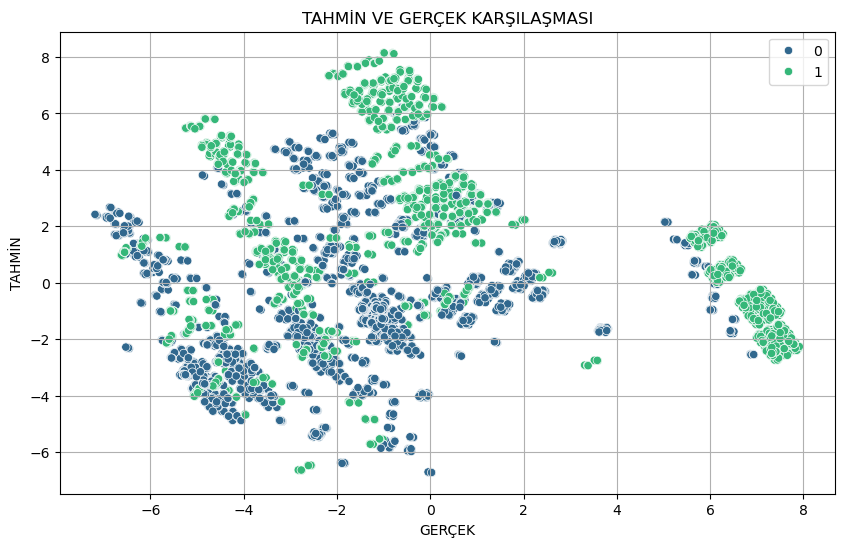

In [21]:
plt.figure(figsize=(10, 6)) # 10 genişlik 6 yükseklik olarak  veriyi yazdırdık
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')  #  xte birinci sutun hariç hepsi yde 1. sutunu yazdırdık
plt.title('TAHMİN VE GERÇEK KARŞILAŞMASI') # başlık attık
plt.xlabel('GERÇEK') # x eksenini yazdırdık
plt.ylabel('TAHMİN') # y eksenini yazdırdık
plt.grid(True) # grafiğre ızgara ekleklettik 
plt.show() # show fonksiyonu ile grafiği gösterdik